In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

# Διαβάζουμε το EmoLex



In [2]:
filepath = "../../data/greek_lexicon_final.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,αμετάφραστο,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,άφεση,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ένορκη βεβαίωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,έχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,έχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
emolex_df.head(20)

,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,αμετάφραστο,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,άφεση,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ένορκη βεβαίωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,έχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,έχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,όριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,όρμος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ύδρα,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,αγία τράπεζα,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,αμήν,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [4]:
emolex_df['word'] = emolex_df['word'].str.replace('ά','α')
emolex_df['word'] = emolex_df['word'].str.replace('έ','ε')
emolex_df['word'] = emolex_df['word'].str.replace('ή','η')
emolex_df['word'] = emolex_df['word'].str.replace('ί','ι')
emolex_df['word'] = emolex_df['word'].str.replace('ό','ο')
emolex_df['word'] = emolex_df['word'].str.replace('ύ','υ')
emolex_df['word'] = emolex_df['word'].str.replace('ώ','ω')

In [5]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()

In [7]:
stop_words_df = pd.read_csv("../../data/stopwords_el.txt", sep="\n", header = None)

lc_stop_words_df = pd.DataFrame()

lc_stop_words_df['stop_w'] = stop_words_df[0].str.lower()
lc_stop_words_df['stop_w'] = lc_stop_words_df['stop_w'].str.strip()
lc_stop_words_df['stop_w'] = lc_stop_words_df['stop_w'].str.replace('∆','δ')
lc_stop_words_df.head(10)

,stop_w
0,ο
1,η
2,το
3,οι
4,τα
5,του
6,της
7,των
8,τον
9,την


## Διαβάζουμε τα tweets



In [9]:
df = pd.read_csv("../../data/TsiprasTweets.tsv", sep = '\t')

In [10]:
len(df)

3230

In [11]:
df.tail()

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
3225,3225,NaN,NaN,Thu Sep 03 18:03:28 +0000 2015,"[0, 126]","{'hashtags': [{'text': 'kerdizoume_to_avrio', ...",NaN,43,False,Μας ζητάνε δήθεν συνεννόηση για να κατηγορούντ...,...,NaN,NaN,NaN,NaN,29,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 334602996, 'id_str': '334602996', 'name..."
3226,3226,NaN,NaN,Thu Sep 03 17:58:40 +0000 2015,"[0, 135]","{'hashtags': [{'text': 'kerdizoume_to_avrio', ...",NaN,58,False,"Η διαπλοκή,οι διαφθορείς, το παλιό πολιτικό σύ...",...,NaN,NaN,NaN,NaN,33,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 334602996, 'id_str': '334602996', 'name..."
3227,3227,NaN,NaN,Thu Sep 03 17:55:43 +0000 2015,"[0, 134]","{'hashtags': [{'text': 'kerdizoume_to_avrio', ...",NaN,68,False,"Όρθιοι συνεχίζουμε τη μάχη. Πιο αποφασισμένοι,...",...,NaN,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 334602996, 'id_str': '334602996', 'name..."
3228,3228,NaN,NaN,Thu Sep 03 17:41:47 +0000 2015,"[0, 135]","{'hashtags': [{'text': 'kedrizoume_to_avrio', ...","{'media': [{'id': 639493501089116160, 'id_str'...",61,False,"Πολίτες του Αιγάλεω, στις 20 του Σεπτέμβρη ξεμ...",...,NaN,NaN,NaN,NaN,39,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 334602996, 'id_str': '334602996', 'name..."
3229,3229,NaN,NaN,Thu Sep 03 17:27:23 +0000 2015,"[0, 111]","{'hashtags': [{'text': 'syriza', 'indices': [8...","{'media': [{'id': 639489878200336384, 'id_str'...",51,False,Σε λίγο ομιλία στο Αιγάλεω. Παρακολουθήστε ζων...,...,NaN,NaN,NaN,NaN,19,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 334602996, 'id_str': '334602996', 'name..."


In [12]:
df.full_text = df.full_text.apply(str)

In [13]:
#df["full_text"] = df["full_text"].apply(clean)

In [14]:
df.shape

(3230, 32)

In [15]:
df.dtypes

Unnamed: 0                     int64
contributors                 float64
coordinates                  float64
created_at                    object
display_text_range            object
entities                      object
extended_entities             object
favorite_count                 int64
favorited                       bool
full_text                     object
geo                          float64
id                             int64
id_str                         int64
in_reply_to_screen_name       object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
is_quote_status                 bool
lang                          object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id             float64
quoted_status_id_str         float64
quoted_status_permalink       object
retweet_count                  int64
r

In [16]:
emolex_df['word'].head(3)

0        αμεταφραστο
1              αφεση
2    ενορκη βεβαιωση
Name: word, dtype: object

In [17]:
vec = CountVectorizer(analyzer = 'word', 
                      vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= lc_stop_words_df['stop_w'].tolist())

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό



matrix = vec.fit_transform(df['full_text'].head(100))
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,αμεταφραστο,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,...,υψος,υψωμα,ωα ψαριων,ωθησε,ωθηση,ωμος,ωρα,ωρα υπνου,ωρες,ωριμος
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
emolex_df.head()

,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,αμεταφραστο,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,αφεση,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
emolex_df[emolex_df.anger == 1].tail()

,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
11630,ονειδος,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11636,οπιο,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
11662,οχλος,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11671,υπουλος,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11675,υφεση,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.anger == 1]['word']

positive_words = emolex_df[emolex_df.positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']




In [31]:
df.head(3)

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,0,NaN,NaN,Sat Apr 06 20:14:50 +0000 2019,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1114622277960830984, 'id_str...",258,False,Απευθύνομαι στις Ελληνίδες και στους Έλληνες π...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1,NaN,NaN,Sat Apr 06 19:58:07 +0000 2019,"[0, 244]","{'hashtags': [{'text': 'ΕνώνουμεΔυνάμεις', 'in...","{'media': [{'id': 1114618247532417026, 'id_str...",250,False,"Η χώρα που γέννησε τη Δημοκρατία, το πολίτευμα...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NaN,NaN,Sat Apr 06 19:44:35 +0000 2019,"[0, 204]","{'hashtags': [{'text': 'ΕνώνουμεΔυνάμεις', 'in...","{'media': [{'id': 1114614863173685250, 'id_str...",152,False,Προσερχόμαστε στο μεγάλο αγώνα για τη νέα εποχ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)




In [33]:
df.head()

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,0,NaN,NaN,Sat Apr 06 20:14:50 +0000 2019,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1114622277960830984, 'id_str...",258,False,Απευθύνομαι στις Ελληνίδες και στους Έλληνες π...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1,NaN,NaN,Sat Apr 06 19:58:07 +0000 2019,"[0, 244]","{'hashtags': [{'text': 'ΕνώνουμεΔυνάμεις', 'in...","{'media': [{'id': 1114618247532417026, 'id_str...",250,False,"Η χώρα που γέννησε τη Δημοκρατία, το πολίτευμα...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NaN,NaN,Sat Apr 06 19:44:35 +0000 2019,"[0, 204]","{'hashtags': [{'text': 'ΕνώνουμεΔυνάμεις', 'in...","{'media': [{'id': 1114614863173685250, 'id_str...",152,False,Προσερχόμαστε στο μεγάλο αγώνα για τη νέα εποχ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NaN,NaN,Sat Apr 06 19:36:35 +0000 2019,"[0, 241]","{'hashtags': [{'text': 'ΕνώνουμεΔυνάμεις', 'in...",NaN,560,False,Είμαστε εδώ για να υψώσουμε τείχος στη Χρυσή Α...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NaN,NaN,Sat Apr 06 19:31:46 +0000 2019,"[0, 239]","{'hashtags': [{'text': 'ΕνώνουμεΔυνάμεις', 'in...",NaN,261,False,Η ΝΔ είναι ένα κόμμα που στηρίζεται σχεδόν απο...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


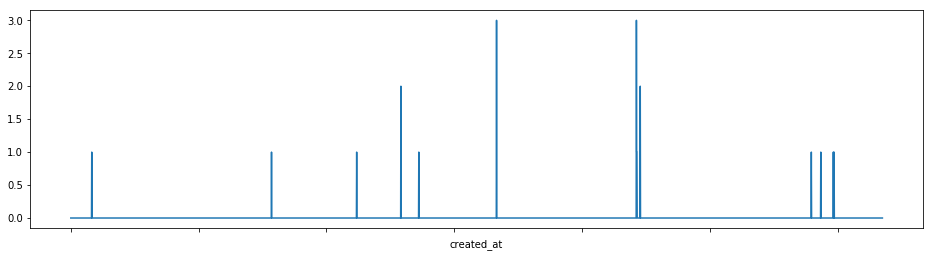

In [36]:
df.groupby('created_at')['joy'].sum().plot(figsize=(16,4), x='created_at')